In [2]:
from typing import List
from pathlib import Path
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from json import loads

In [2]:
%pwd

'/home/ste/Documents/gesture-gaze-extension/notebooks'

In [3]:
image_files : List[Path] = sorted(list(Path("/home/ste/Documents/gesture-gaze-extension/datasets/SynthGazeProcessed/images").iterdir()))
annotation_files : List[Path] = sorted(list(Path("/home/ste/Documents/gesture-gaze-extension/datasets/SynthGazeProcessed/json").iterdir()))

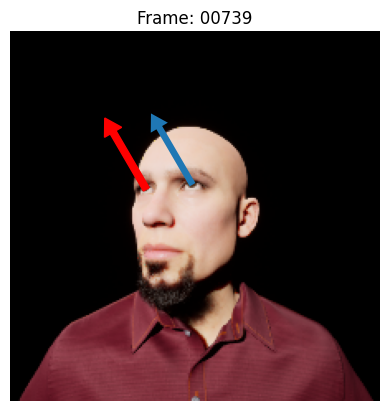

In [164]:
rnd_index : int = randint(0, len(image_files))
rnd_image_file : Path = image_files[rnd_index]
rnd_annotation_file : Path = annotation_files[rnd_index]

img = plt.imread(rnd_image_file)
data = loads(rnd_annotation_file.read_text())

fig, ax = plt.subplots()

ax.imshow(img)

gazeDirection = np.array(data["Overall"]["ImageEyesGazeDirection"]) 
headDirection = np.array(data["Overall"]["ImageHeadDirection"]) 
left_eye =  np.array(data["Landmarks"]["L_Pupil"]) 
right_eye =  np.array(data["Landmarks"]["R_Pupil"])

arrow_width = 20
offset = 50

ax.add_patch(plt.Arrow(*left_eye, *(gazeDirection*offset), width=arrow_width))
ax.add_patch(plt.Arrow(*right_eye, *(gazeDirection*offset), width=arrow_width, color="r"))

plt.axis(False)
plt.title(f"Frame: {rnd_image_file.stem}")

# Show the image
plt.show()